In [1]:
from numpy.core.function_base import linspace
import pandas as pd
from  scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline
import numpy as np
from matplotlib import pyplot as plt

MH_Ni = pd.read_csv("Ni_MH.csv", sep = "\t", decimal = ',')



In [10]:
#Ni o masie 0.0898 g i gęstości 8908 kg/m3 = 8.908 g/cm3.
m_Ni = 0.08898
rho_Ni = 8.908
M_A_Ni = 58,6934
N_A = 6.022*10**23
mu_b = 9.27401/10**(21)

mu0 = 4 * np.pi * 10**(-7) #H/m - pezenikalnosc magn. prozni

HT_mu0 = MH_Ni["mi0HT"]  # miOHT - natężenie pola magnetycznego pomnożone przez μ0. μ0H (T). - indukcja magn.
sHT_mu0 = MH_Ni["SH"]  #SH - niepewność mi0H
M_emu = MH_Ni["Memu"]  #Memu - namagnesowanie w emu.
sM_emu = MH_Ni["SMemu"]  #SM - niepewność pomiaru SMemu
T_sampK = MH_Ni["TsampK"]  #TsamK - Temperatura w okolicy próbki w K. 
sT_samp = MH_Ni["STsamp"]  #STsam - niepewność Tsam.

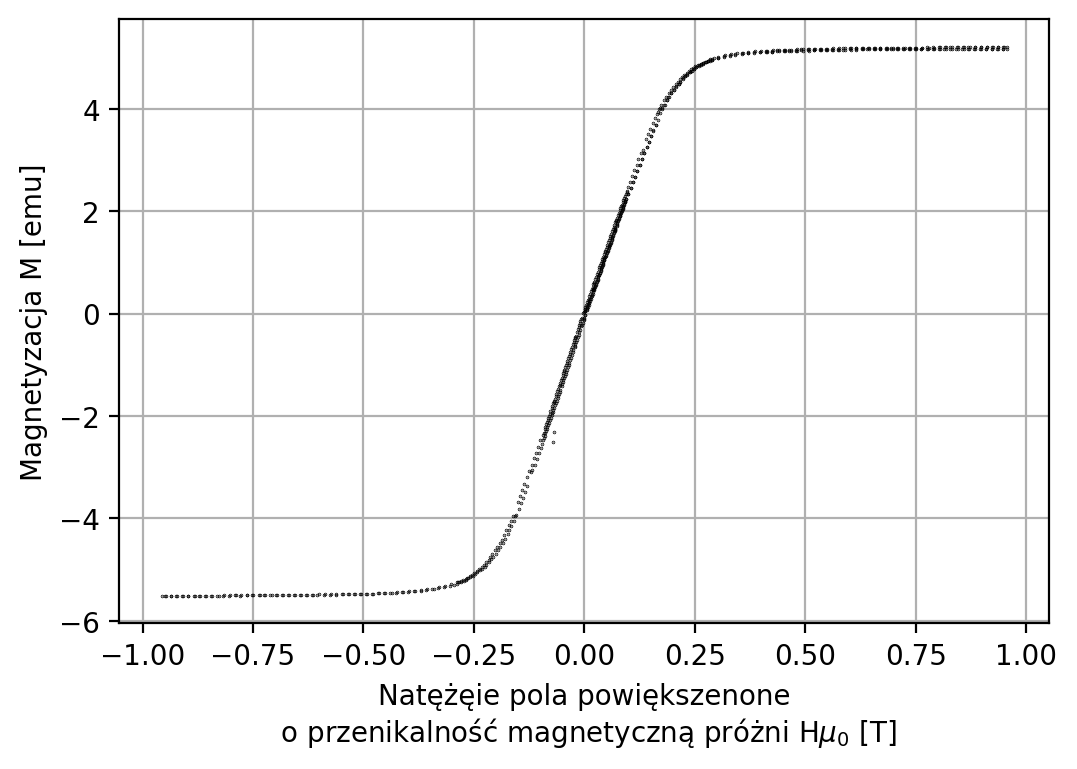

In [9]:
plt.figure(dpi=200)
plt.plot(HT_mu0, M_emu, ".",color = "black", markersize = 0.5)
plt.grid()
plt.xlabel("Natężęie pola powiększenone\n o przenikalność magnetyczną próżni H${\mu_0}$ [T]")
plt.ylabel("Magnetyzacja M [emu]")
plt.savefig("Ni_dane")

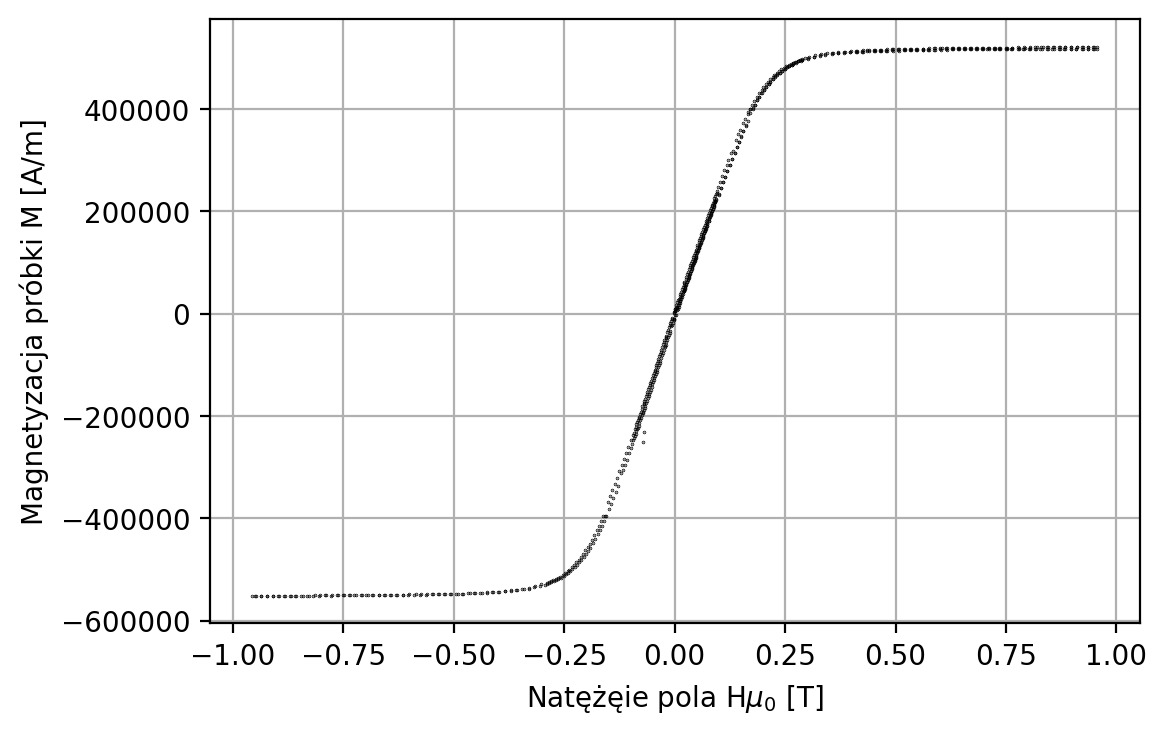

In [4]:
#M(B) [A/m]

MH_Am = M_emu*rho_Ni*1000/m_Ni #[A/m]
H = HT_mu0/mu0

plt.figure(dpi=200)
plt.plot(HT_mu0, MH_Am, ".", color = "black", markersize = 0.5)
plt.grid()
plt.xlabel("Natężęie pola H${\mu_0}$ [T]")
plt.ylabel("Magnetyzacja próbki M [A/m]")
plt.savefig("Ni_SI")

In [5]:
# # Upper hysteresis interpolation

# minHT_index_up = np.where(HT_mu0 == np.min(HT_mu0))[0]
# maxHT_index_up = np.where(HT_mu0 == np.max(HT_mu0))[0]
# range_index_up = np.arange(maxHT_index_up,minHT_index_up,1) # range of indexes for upper part of curve
# print( "Range od index:", range_index_up[0], range_index_up[-1])


# range_x_up =  np.flip(HT_mu0[range_index_up])
# range_y_up = np.flip(MH_Am[range_index_up])

# # for i in range_index_up[:-2]:
# #     if(range_y_up[i+1] < range_y_up[i]):
# #         np.delete(range_x_up, i+1)
# #         np.delete(range_y_up, i+1)

# x_up = np.linspace(HT_mu0[minHT_index_up-1],HT_mu0[maxHT_index_up+1], 1000)

# Mh_up = interp1d(range_x_up, range_y_up, kind = 'cubic')
# print("Pozostałość magnetyczna", Mh_up(0))

# Hm_up = InterpolatedUnivariateSpline(range_y_up, range_x_up)
# print("Pole koercji: ", Hm_up(0))


# plt.figure(dpi=100)
# plt.plot(HT_mu0, MH_Am, ".", color = "black", ms = 0.5)
# plt.plot(x_up,Mh_up(x_up), "--", lw = 0.5)
# plt.plot(0,Mh_up(0) , "r+", ms = 3)
# plt.grid()
# plt.xlabel("Natężęie pola H${\mu_0}$ [T]")
# plt.ylabel("Magnetyzacja próbki M [A/m]")
# plt.savefig("Ni_M(H)_interp")

# plt.figure(dpi=100)
# plt.plot(HT_mu0, MH_Am, ".", color = "black", ms = 0.5)
# plt.plot(x_up,Mh_up(x_up), "--", lw = 0.5)
# plt.plot(0,Mh_up(0) , "r+", ms = 3)
# plt.plot(Hm_up(0), 0, "r+", ms = 3)
# plt.axhline("--", color = "grey", lw = 0.5)
# plt.axvline("--", color = "grey", lw = 0.5)
# plt.xlabel("Natężęie pola H${\mu_0}$ [T]")
# plt.ylabel("Magnetyzacja próbki M [A/m]")
# plt.xlim([-0.01, 0.01])
# plt.ylim([-10000, 10000])
# plt.savefig("Ni_M(H)")

Range od index: 145 435


ValueError: Length of passed values is 290, index implies 291.

Randg od index: 131 447
Pozostałość magnetyczna 5608.904523851135
Pole koercji:  -0.0029048185121107266


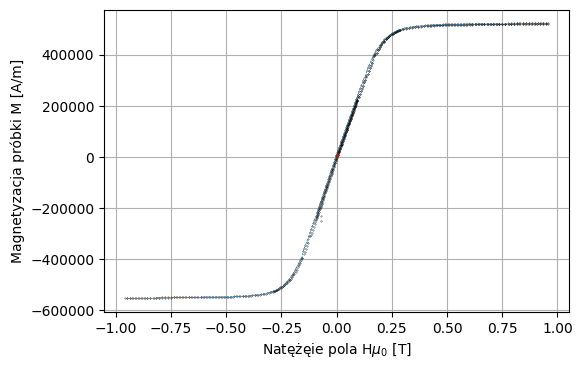

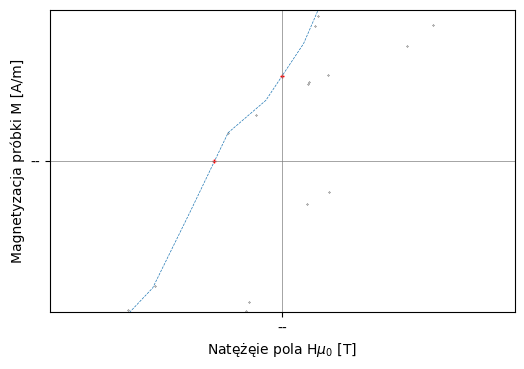

Range od index: 145 435
Pozostałość magnetyczna 5608.904523851135
Pole koercji:  -0.0029048185121107266


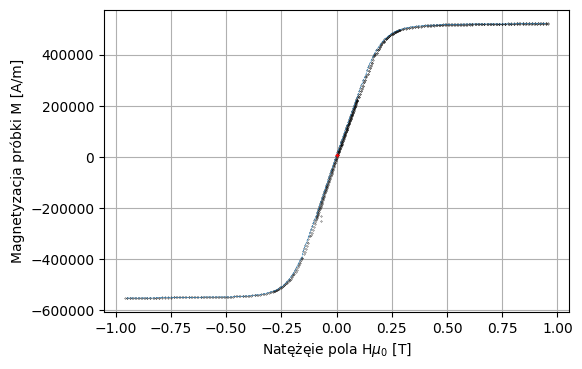

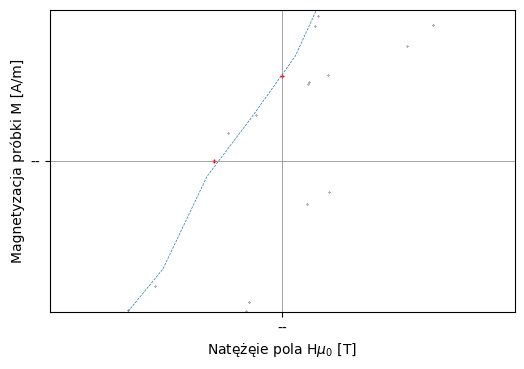

In [ ]:

# Upper hysteresis interpolation

minHT_index_up = np.where(HT_mu0 == np.min(HT_mu0))[0]
maxHT_index_up = np.where(HT_mu0 == np.max(HT_mu0))[0]
range_index_up = np.arange(maxHT_index_up,minHT_index_up,1) # range of indexes for upper part of curve
print( "Range od index:", range_index_up[0], range_index_up[-1])

range_x_up =  np.flip(HT_mu0[range_index_up])
range_y_up = np.flip(MH_Am[range_index_up])

x_up = np.linspace(HT_mu0[minHT_index_up-1],HT_mu0[maxHT_index_up+1], 1000)

Mh_up = interp1d(range_x_up, range_y_up, kind = 'linear')
print("Pozostałość magnetyczna", Mh_up(0))

Hm_up = interp1d(range_y_up, range_x_up,  kind = 'linear')
print("Pole koercji: ", Hm_up(0))


plt.figure(dpi=100)
plt.plot(HT_mu0, MH_Am, ".", color = "black", ms = 0.5)
plt.plot(x_up,Mh_up(x_up), "--", lw = 0.5)
plt.plot(0,Mh_up(0) , "r+", ms = 3)
plt.grid()
plt.xlabel("Natężęie pola H${\mu_0}$ [T]")
plt.ylabel("Magnetyzacja próbki M [A/m]")
plt.savefig("Ni_M(H)_interp")

plt.figure(dpi=100)
plt.plot(HT_mu0, MH_Am, ".", color = "black", ms = 0.5)
plt.plot(x_up,Mh_up(x_up), "--", lw = 0.5)
plt.plot(0,Mh_up(0) , "r+", ms = 3)
plt.plot(Hm_up(0), 0, "r+", ms = 3)
plt.axhline("--", color = "grey", lw = 0.5)
plt.axvline("--", color = "grey", lw = 0.5)
plt.xlabel("Natężęie pola H${\mu_0}$ [T]")
plt.ylabel("Magnetyzacja próbki M [A/m]")
plt.xlim([-0.01, 0.01])
plt.ylim([-10000, 10000])
plt.savefig("Ni_M(H)")

Range od index: 436 726
Pozostałość magnetyczna -5697.6817402562365
Pole koercji:  0.002734014811952602


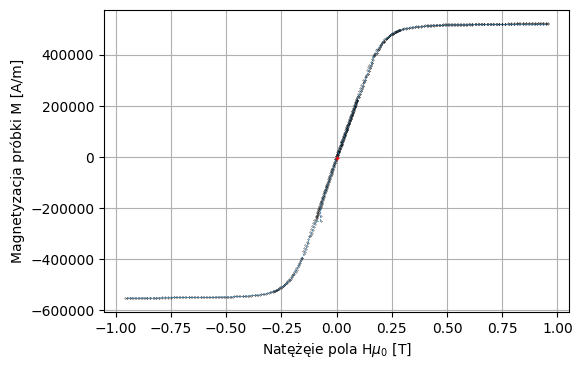

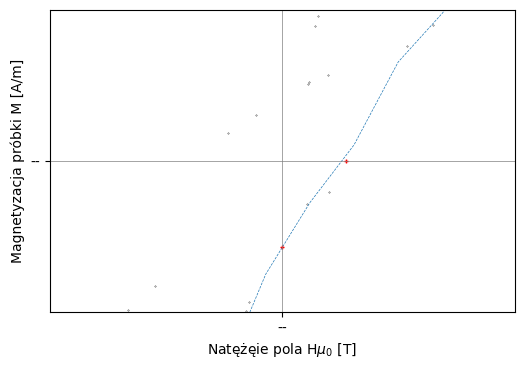

In [ ]:
# Lower hysteresis interpolation

minHT_index_low = np.where(HT_mu0 == np.min(HT_mu0))[0]
maxHT_index_low = np.where(HT_mu0[minHT_index_low[0]:] == np.max(HT_mu0[minHT_index_low[0]:]))[0] + minHT_index_low

range_index_low = np.arange(minHT_index_low,maxHT_index_low,1)
print( "Range od index:", range_index_low[0], range_index_low[-1])

range_x_low =  HT_mu0[range_index_low]
range_y_low = MH_Am[range_index_low]

x_low = np.linspace(HT_mu0[minHT_index_low+1],HT_mu0[maxHT_index_low-1], 1000)

Mh_low = interp1d(range_x_low, range_y_low, kind = "linear")
print("Pozostałość magnetyczna", Mh_low(0))

Hm_low = interp1d(range_y_low, range_x_low,  kind = "linear")
print("Pole koercji: ", Hm_low(0))


plt.figure(dpi=100)
plt.plot(HT_mu0, MH_Am, ".", color = "black", ms = 0.5)
plt.plot(x_low,Mh_low(x_low), "--", lw = 0.5)
plt.plot(0,Mh_low(0) , "r+", ms = 3)
plt.grid()
plt.xlabel("Natężęie pola H${\mu_0}$ [T]")
plt.ylabel("Magnetyzacja próbki M [A/m]")
plt.savefig("Ni_M(H)_interp")

plt.figure(dpi=100)
plt.plot(HT_mu0, MH_Am, ".", color = "black", ms = 0.5)
plt.plot(x_low,Mh_low(x_low), "--", lw = 0.5)
plt.plot(0,Mh_low(0) , "r+", ms = 3)
plt.plot(Hm_low(0), 0, "r+", ms = 3)
plt.axhline("--", color = "grey", lw = 0.5)
plt.axvline("--", color = "grey", lw = 0.5)
plt.xlabel("Natężęie pola H${\mu_0}$ [T]")
plt.ylabel("Magnetyzacja próbki M [A/m]")
plt.xlim([-0.01, 0.01])
plt.ylim([-10000, 10000])
plt.savefig("Ni_M(H)")

In [13]:
M_bohr = (M_emu*M_A_Ni)/(m_Ni*N_A*mu_b)  

ValueError: operands could not be broadcast together with shapes (769,) (2,) 

-761357.4590158543 521775.7383681726
1000
[-551809.45380984 -551809.45380984 -551809.45380984 -551809.45380984
 -551809.45380984 -551809.45380984 -551809.45380984 -551809.45380984
 -551809.45380984 -551809.45380984 -551809.45380984 -551809.45380984
 -551809.45380984 -551809.45380984 -551809.45380984 -551809.45380984
 -551809.45380984 -551809.45380984 -551809.45380984 -551809.45380984
 -551809.45380984 -551809.45380984 -551809.45380984 -551809.45380984
 -551809.45380984 -551809.45380984 -551809.45380984 -551809.45380984
 -551809.45380984 -551809.45380984 -551809.45380984 -551809.45380984
 -551809.45380984 -551809.45380984 -551809.45380984 -551809.45380984
 -551809.45380984 -551809.45380984 -551809.45380984 -551809.45380984
 -551809.45380984 -551809.45380984 -551809.45380984 -551809.45380984
 -551809.45380984 -551809.45380984 -551809.45380984 -551809.45380984
 -551809.45380984 -551809.45380984 -551809.45380984 -551809.45380984
 -551809.45380984 -551809.45380984 -551809.45380984 -551809.4

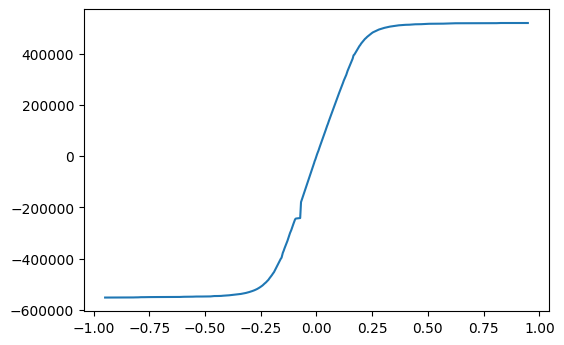

In [ ]:
print(np.min(H), np.max(MH_Am))

x_mean = np.linspace(HT_mu0[minHT_index_low+1], HT_mu0[maxHT_index_low-1],1000)

Mh_mean = (Mh_up(x_mean)+Mh_low(x_mean))/2

x_mean = np.ndarray((x_mean.size), dtype=float, buffer=x_mean)
Mh_mean = np.ndarray((Mh_mean.size), dtype=float, buffer= Mh_mean)
print(x_mean.size)
print(Mh_mean)

plt.figure(dpi=100)
plt.plot(x_mean, Mh_mean)


Ms:  0.005945392250666965 , a:  17.40542103324642 , b:  -0.00014059158976697698
s(Ms):  1.7465490130297275e-10 , s(a):  0.032279978725792045 , s(b):  4.9095264491101146e-11


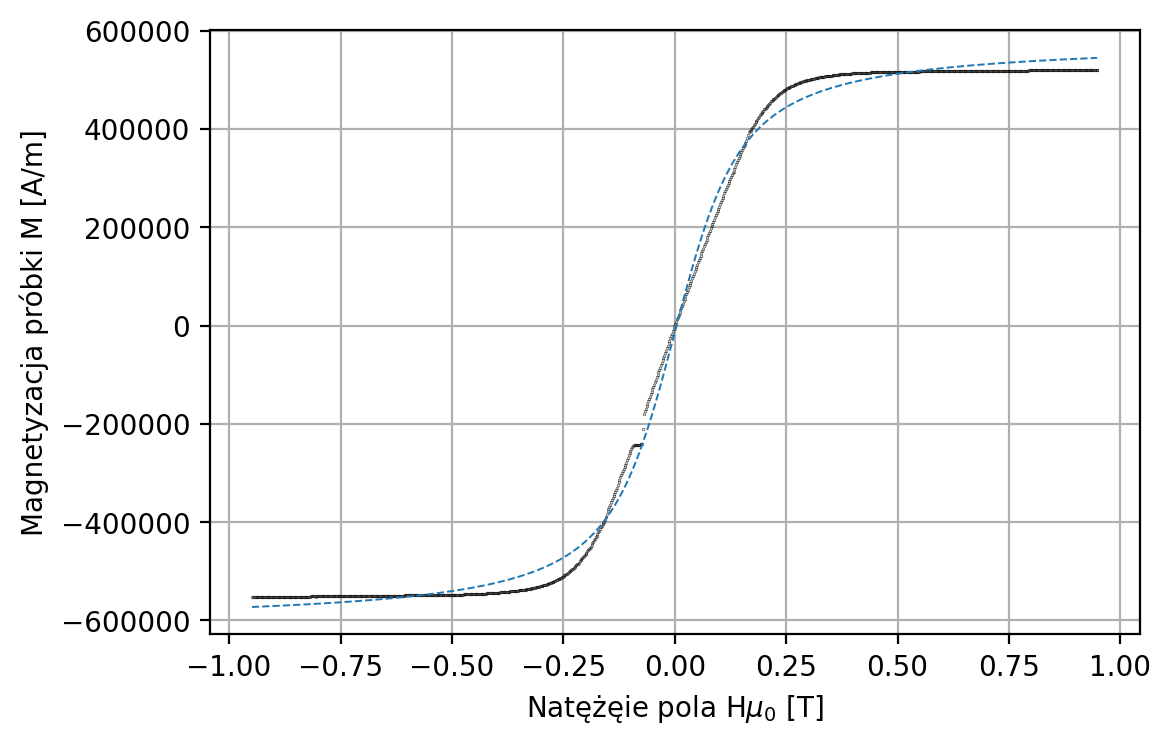

In [ ]:
def curv(x, Ms, a, b):

    y = Ms*((np.exp(a*x)+np.exp(-a*x))/(np.exp(a*x)-np.exp(-a*x))-1/(a*x))+b
    return y


popt, pcov = curve_fit(curv, x_mean, Mh_mean/10**8)

Ms_fited = popt[0]
a_fited = popt[1]
b_fited = popt[2]
print("Ms: ", Ms_fited, ", a: ", a_fited, ", b: ", b_fited)
print("s(Ms): ",pcov[0][0], ", s(a): ", pcov[1][1], ", s(b): ", pcov[2][2])

x_fit = np.linspace(HT_mu0[minMH_index-1],HT_mu0[maxMH_index+1], 1000)
fited_curve = curv(x_fit, Ms_fited, a_fited, b_fited)

plt.figure(dpi=200)
plt.plot(x_mean, Mh_mean, ".", color = "black", ms = 0.3)
plt.plot(x_fit,fited_curve*(10**8), "--", lw = 0.7)
plt.grid()
plt.xlabel("Natężęie pola H${\mu_0}$ [T]")
plt.ylabel("Magnetyzacja próbki M [A/m]")
plt.savefig("Ni_M(H)")
plt.show()

Ms:  0.061219026224588545 , a:  15.140394298084695 , b:  -0.0005946713396046734
s(Ms):  1.3997848608369604e-07 , s(a):  0.07079062260412688 , s(b):  2.3877376005896593e-08


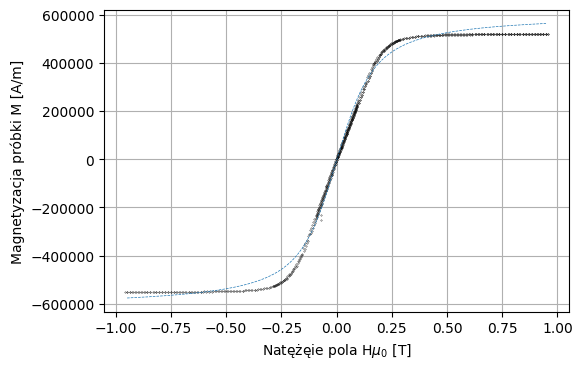

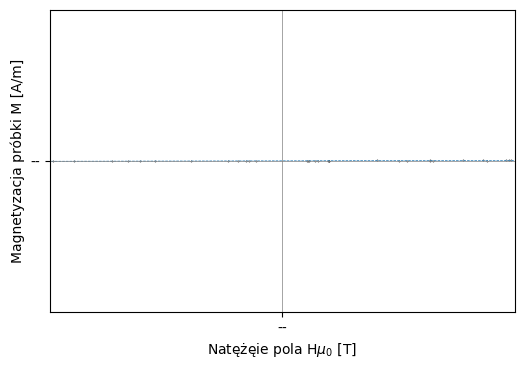

In [ ]:
#Aproxymation of low-part curve

def curv(x, Ms, a, b):

    y = Ms*((np.exp(a*x)+np.exp(-a*x))/(np.exp(a*x)-np.exp(-a*x))-1/(a*x))+b
    return y

popt, pcov = curve_fit(curv, range_x, range_y/(10**7))

Ms_fited = popt[0]
a_fited = popt[1]
b_fited = popt[2]
print("Ms: ", Ms_fited, ", a: ", a_fited, ", b: ", b_fited)
print("s(Ms): ",pcov[0][0], ", s(a): ", pcov[1][1], ", s(b): ", pcov[2][2])

fited_curve = curv(x, Ms_fited, a_fited, b_fited)

plt.figure(dpi=100)
plt.plot(HT_mu0, MH_Am, ".", color = "black", ms = 0.5)
plt.plot(x,fited_curve*(10**7), "--", lw = 0.5)
plt.grid()
plt.xlabel("Natężęie pola H${\mu_0}$ [T]")
plt.ylabel("Magnetyzacja próbki M [A/m]")
plt.savefig("Ni_M(H)")
plt.show()

plt.figure(dpi=100)
plt.plot(HT_mu0, MH_Am, ".", color = "black", ms = 0.5)
plt.plot(x,fited_curve*(10**7), "--", lw = 0.5)
plt.axhline("--", color = "grey", lw = 0.5)
plt.axvline("--", color = "grey", lw = 0.5)
plt.xlabel("Natężęie pola H${\mu_0}$ [T]")
plt.ylabel("Magnetyzacja próbki M [A/m]")
plt.xlim([-0.01, 0.01])
plt.ylim([-10000000, 10000000])
plt.savefig("Ni_M(H)_interp")

plt.show()